In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 164s 1us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

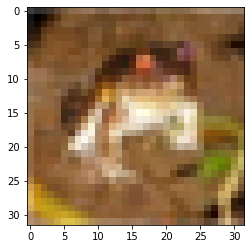

In [6]:
plt.imshow(x_train[0])

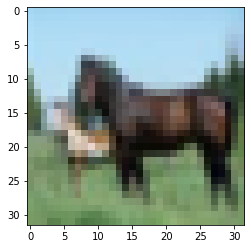

In [7]:
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [27]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 315s 6ms/sample - loss: 1.5151 - accuracy: 0.4585 - val_loss: 1.3138 - val_accuracy: 0.5426
Epoch 2/15
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.1664 - accuracy: 0.5928 - val_loss: 1.1561 - val_accuracy: 0.6039
Epoch 3/15
50000/50000 [==============================] - 50s 1ms/sample - loss: 1.0192 - accuracy: 0.6476 - val_loss: 1.0189 - val_accuracy: 0.6483
Epoch 4/15
50000/50000 [==============================] - 50s 1ms/sample - loss: 0.9218 - accuracy: 0.6819 - val_loss: 1.1022 - val_accuracy: 0.6393
Epoch 5/15
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.8428 - accuracy: 0.7100 - val_loss: 1.0737 - val_accuracy: 0.6437
Epoch 6/15
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.7857 - accuracy: 0.7328 - val_loss: 1.0399 - val_accuracy: 0.6698


In [30]:
losses = pd.DataFrame(model.history.history)

In [31]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.515109,0.45854,1.313785,0.5426
1,1.166409,0.59280,1.156076,0.6039
2,1.019202,0.64764,1.018888,0.6483
3,0.921838,0.68188,1.102194,0.6393
4,0.842755,0.71000,1.073676,0.6437


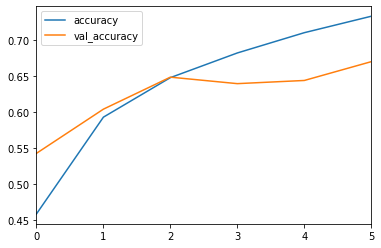

In [32]:
losses[['accuracy','val_accuracy']].plot()

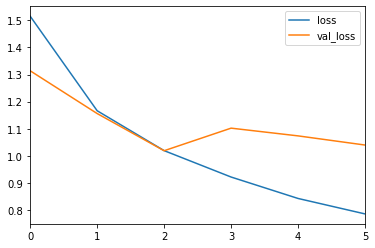

In [33]:
losses[['loss','val_loss']].plot()

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0398574822425841, 0.6698]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1000
           1       0.76      0.84      0.80      1000
           2       0.42      0.72      0.53      1000
           3       0.55      0.41      0.47      1000
           4       0.66      0.62      0.64      1000
           5       0.67      0.44      0.53      1000
           6       0.77      0.73      0.75      1000
           7       0.76      0.72      0.74      1000
           8       0.77      0.73      0.75      1000
           9       0.76      0.77      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [38]:
confusion_matrix(y_test,predictions)

array([[710,  21,  74,  13,  20,   4,   6,  14,  93,  45],
       [ 23, 837,  27,   4,   3,   0,   8,   4,  17,  77],
       [ 61,   9, 716,  39,  54,  30,  43,  25,  15,   8],
       [ 29,  31, 197, 415,  58, 107,  69,  49,  22,  23],
       [ 23,  12, 174,  29, 625,  15,  46,  58,  12,   6],
       [ 15,  14, 226, 156,  58, 438,  18,  55,   7,  13],
       [ 10,  26,  97,  38,  59,  18, 731,   7,   8,   6],
       [ 18,   4, 102,  35,  62,  25,  11, 719,   7,  17],
       [ 88,  52,  50,  11,   2,   8,   7,   6, 733,  43],
       [ 32,  93,  35,  10,   2,   4,   6,  12,  32, 774]], dtype=int64)

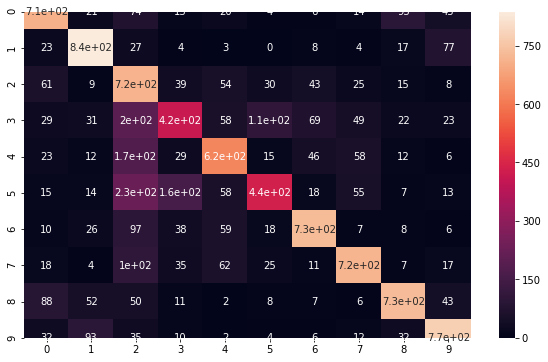

In [39]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

In [40]:
my_image = x_test[16]

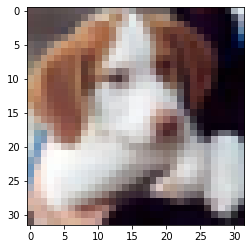

In [41]:
plt.imshow(my_image)

In [42]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)